## Implementing Simple Neural Networks in Numpy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
np.random.seed(1)

In [3]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

(2, 200) (1, 200)
[[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1
  0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
  1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0
  0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
  0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
  0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0]]


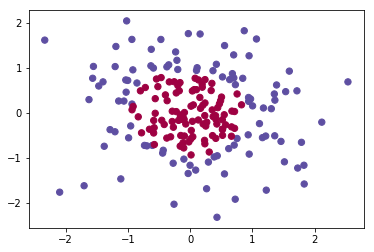

In [4]:
gaussian_quantiles = load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
print(X.shape, Y.shape)
print(Y)

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral)

In [5]:
shape_X = X.shape
shape_Y = Y.shape

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)


### Logistics Regression on a Classification Problem

In [6]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

c:\users\laoma\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\laoma\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [7]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap=plt.cm.Spectral)

Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)


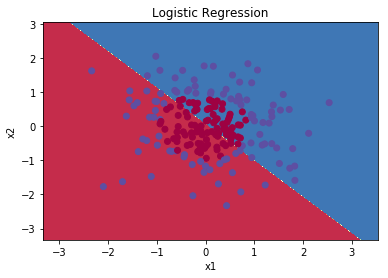

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

### build a Neural Network model with one hidden layer
Below is the structure of the NN Model

1. Define the neural network structure ( # of input units, # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)
4. Then merge them into one function we call `nn_model()`. 
Once we built `nn_model()` and learnt the right parameters,we    can make predictions on new data.

In [43]:
def layer_sizes(X, n_h, Y):
    return (X.shape[0], n_h, Y.shape[0])

def initialize_parameters(n_x, n_h, n_y):
    # W1 = np.random.randn(n_h, n_x) * 0.01  # random numbers
    # W1 = np.random.randn(n_h, n_x) / np.sqrt(n_x)  # Xavier initialization
    W1 = np.random.randn(n_h, n_x) / np.sqrt(n_x/2)  # He et al., 2015
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) / np.sqrt(n_h/2)
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters
    
def forward(X, parameters):
    Y1 = np.dot(parameters["W1"], X) + parameters["b1"]
    A1 = np.tanh(Y1)
    Y2 = np.dot(parameters["W2"], A1) + parameters["b2"]
    A2 = 1. / (1 + np.exp(-Y2))
    
    return {"A1": A1, "A2": A2} # cache

def compute_loss(A2, Y):
    """ cross-entropy loss """
    sum = np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2))
    loss = - np.sum(sum) / Y.shape[1]
    return loss

def backward(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Y1", "A1", "Y2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dY2 = A2 - Y
    dW2 = (1 / m) * np.dot(dY2, A1.T)
    db2 = (1 / m) * np.sum(dY2, axis=1, keepdims=True)
    dY1 = np.multiply(np.dot(W2.T, dY2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dY1, X.T)
    db1 = (1 / m) * np.sum(dY1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters(parameters, grads, lr):
    parameters["W1"] -= lr * grads["dW1"]
    parameters["b1"] -= lr * grads["db1"]
    parameters["W2"] -= lr * grads["dW2"]
    parameters["b2"] -= lr * grads["db2"]

In [44]:
def nn_model(X, Y, n_h, epochs, lr=0.1, print_loss=False):
    n_x, n_h, n_y = layer_sizes(X, n_h, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(epochs):
        cache = forward(X, parameters)
        loss = compute_loss(cache["A2"], Y)
        grads = backward(parameters, cache, X, Y)
        update_parameters(parameters, grads, lr)
        
        if print_loss and i % 1000 == 0:
            print("epoch {}: loss {}".format(i, loss))
            
    return parameters
            
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    cache = forward(X, parameters)
    predictions = cache["A2"] > 0.5
    ### END CODE HERE ###
    
    return predictions

In [45]:
n_h = 4

epochs = 70000
lr = 0.1
print_loss = True

parameters = nn_model(X, Y, n_h, epochs, lr, print_loss)

epoch 0: loss 0.6980134607729599
epoch 1000: loss 0.29323391425553286
epoch 2000: loss 0.20977473085539458
epoch 3000: loss 0.18158134144579952
epoch 4000: loss 0.16326203230336792
epoch 5000: loss 0.14930032060908996
epoch 6000: loss 0.1383674635549566
epoch 7000: loss 0.12938171228540343
epoch 8000: loss 0.12164554131777919
epoch 9000: loss 0.11500640047424347
epoch 10000: loss 0.10944711580701733
epoch 11000: loss 0.10453993363145746
epoch 12000: loss 0.10006603141074524
epoch 13000: loss 0.0961335572045542
epoch 14000: loss 0.09277938107349616
epoch 15000: loss 0.0899038313150642
epoch 16000: loss 0.08738932793863674
epoch 17000: loss 0.0851437202600805
epoch 18000: loss 0.08310491897660141
epoch 19000: loss 0.08123307572183887
epoch 20000: loss 0.0795015943012017
epoch 21000: loss 0.07789128372566122
epoch 22000: loss 0.0763872991702468
epoch 23000: loss 0.07497761410110909
epoch 24000: loss 0.07365221039447056
epoch 25000: loss 0.07240259963358629
epoch 26000: loss 0.071221507461

c:\users\laoma\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
c:\users\laoma\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


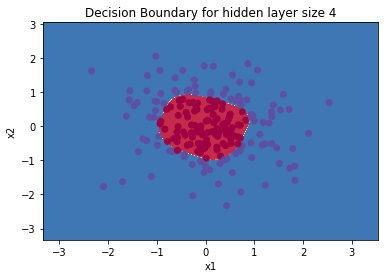

In [30]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4));

In [31]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 99%


Accuracy for 1 hidden units: 68.0 %
Accuracy for 2 hidden units: 80.5 %
Accuracy for 3 hidden units: 92.5 %
Accuracy for 4 hidden units: 93.5 %
Accuracy for 5 hidden units: 93.0 %
Accuracy for 20 hidden units: 95.5 %
Accuracy for 50 hidden units: 93.0 %


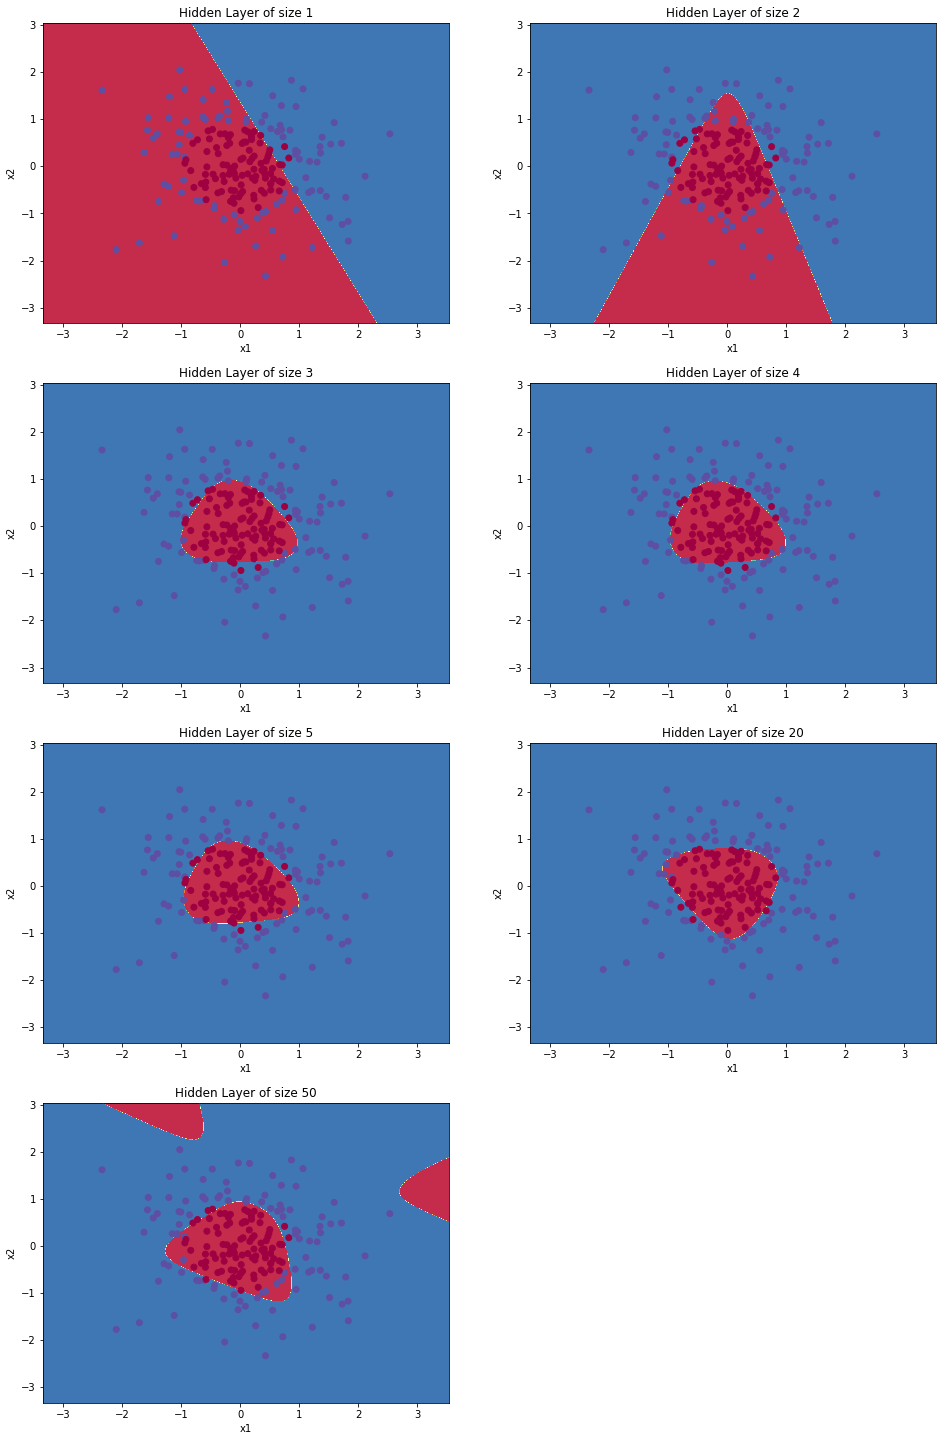

In [35]:
# Running the model with diffrent number of neurons in the hiddern layer

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, epochs = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))